In [1]:
import nltk
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

from collections import defaultdict
from nltk.sentiment import SentimentIntensityAnalyzer

stopwords = nltk.corpus.stopwords.words("english")

nltk.download([
        "names",
        "stopwords",
        "state_union",
        "twitter_samples",
        "movie_reviews",
        "averaged_perceptron_tagger",
        "vader_lexicon",
        "punkt",
])

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package names to /Users/rory/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/rory/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to
[nltk_data]     /Users/rory/nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/rory/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/rory/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/rory/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/rory/nltk_data...
[nltk_data]   Package vader

In [2]:
def words_(text):
    words = re.split('; |, |\*|\n| ', 
                     [''.join([' '.join(re.split('; |, |\*|\n| |[0-9]|%|&|©|[$]|-|[|]|[\']|[/]|[?]|\]|\[|[S]|[A]|[P]|[B]|[L]|[TE]',
                                               text))][0].split(r"."))][0])
    words = [' '.join(words)][0]
    return nltk.word_tokenize(words)

def words_remove_stopwords(words):
    
    words=[w for w in words if w not in stopwords]
    
    return words

def words_remove_meaningless_words(words):
    
    meaningless_words=['Thank', 'thank', 'Welcome',
                       'GAAP', 'quarter', 'million',
                       'GAAP', 'Copyright']
    
    words=[w for w in words if w not in meaningless_words]
    
    return words

def join(text):
    return [' '.join(text)]

def split_(text):
    return re.split(" ", text)

In [3]:
path='/Volumes/4TB/ConferenceCall/Tesla/csvfile/tesla_earning_call_executives_answer.csv'

In [4]:
data=pd.read_csv(path)
data['call_datetime']=pd.to_datetime(data['call_datetime'], format='%Y-%m-%d')
data=data.sort_values('call_datetime')

In [5]:
data.columns

Index(['time', 'call_datetime', 'call_year', 'call_month', 'call_day',
       'company_name', 'company', 'quarter', 'year_quarter',
       'executives_answer'],
      dtype='object')

In [7]:
data['executive_text']=data['executives_answer'].apply(lambda x: words_(x))

data['executive_text_removestopwords']=\
data['executive_text'].apply(lambda x: words_remove_stopwords(x))

data['executive_text_removestopwords']=\
data['executive_text_removestopwords'].apply(lambda x: words_remove_meaningless_words(x))

In [8]:
finder = nltk.collocations.TrigramCollocationFinder.from_words(
    data['executive_text_removestopwords'][0])

In [9]:
finder.ngram_fd.most_common(12)

[(('nd', 'I', 'think'), 3),
 (('long', 'term', 'potential'), 2),
 (('ut', 'I', 'think'), 2),
 (('I', 'think', 'always'), 2),
 (('part', 'dependent', 'upon'), 2),
 (('comfortable', 'making', 'predictions'), 2),
 (('I', 'think', 'good'), 2),
 (('think', 'good', 'chance'), 2),
 (('I', 'think', 'I'), 2),
 (('timing', 'risk', 'would'), 2),
 (('I', 'think', 'sort'), 2),
 (('R', 'V', 'owertrain'), 2)]

In [10]:
finder = nltk.collocations.BigramCollocationFinder.from_words(
    data['executive_text_removestopwords'][0])

In [11]:
finder.ngram_fd.most_common(10)

[(('I', 'think'), 27),
 (('R', 'V'), 10),
 (('nd', 'I'), 5),
 (('long', 'term'), 4),
 (('ut', 'I'), 4),
 (('little', 'bit'), 3),
 (('anoramic', 'roof'), 3),
 (('timing', 'risk'), 3),
 (('systems', 'integration'), 3),
 (('I', 'would'), 3)]

In [12]:
finder = nltk.collocations.QuadgramCollocationFinder.from_words(
    data['executive_text_removestopwords'][0])

In [13]:
finder.ngram_fd.most_common(5)

[(('I', 'think', 'good', 'chance'), 2),
 (('Well', 'great', 'deal', 'long'), 1),
 (('great', 'deal', 'long', 'term'), 1),
 (('deal', 'long', 'term', 'potential'), 1),
 (('long', 'term', 'potential', 'approach'), 1)]

In [15]:
data['executive_neg']=\
data['executives_answer'].apply(lambda x: sia.polarity_scores(x)['neg'])

data['executive_pos']=\
data['executives_answer'].apply(lambda x: sia.polarity_scores(x)['pos'])

data['executive_neu']=\
data['executives_answer'].apply(lambda x: sia.polarity_scores(x)['neu'])

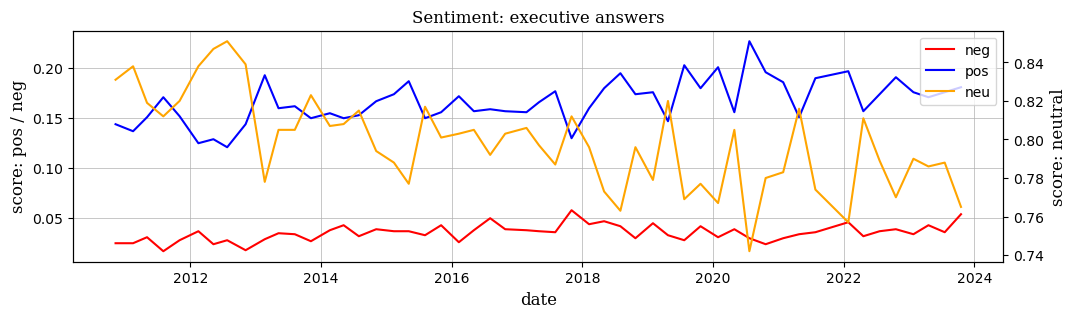

In [39]:
csfont = {'fontname':'serif'}
sizetext=12

fig, (ax1) = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 3))

lns1=ax1.plot(data['call_datetime'], data['executive_neg'], label='neg', color='r')
lns2=ax1.plot(data['call_datetime'], data['executive_pos'], label='pos', color='b')

ax1.set_title("Sentiment: executive answers", **csfont, size = sizetext)
ax1.set_ylabel('score: pos / neg', size = sizetext, **csfont)
ax1.set_xlabel('date', size = sizetext, **csfont)
ax1.grid(linewidth=0.5)

ax2 = ax1.twinx()
lns3=ax2.plot(data['call_datetime'], data['executive_neu'], label='neu', color='orange')
ax2.set_ylabel('score: neutral', size = sizetext, **csfont)

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=1)

In [42]:
path_output=\
'/Volumes/4TB/ConferenceCall/Tesla/csvfile/tesla_earning_call_executive_answer_sentiment.csv'

data.to_csv(path_output, index = False)